In [100]:
import csv
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
data_test = pd.read_csv('test.csv',encoding='utf-8')
data_train = pd.read_csv('train.csv',encoding='utf-8')

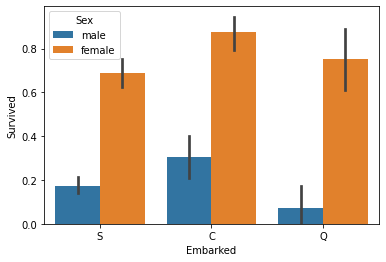

In [101]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train)

In [102]:
#plt.figure(figsize=(15,15))
#sns.heatmap(data_train.corr(),annot=True)
#原本想看相關係數決定要取哪些因子，但因為只能處理數字，所以先處理數據集

In [103]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
x = data_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Cabin', 'Embarked']]
#用猜測的覺得Passengerid,Name,Ticket不重要
#x.head()

In [105]:
x = x.copy()
x = x.join(pd.get_dummies(x.Sex))#對sex做one hot
del x['Sex']
x = x.join(pd.get_dummies(x.Embarked))#對Embarked做one hot
del x['Embarked']

In [106]:
x

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,B42,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,NaN,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,C148,0,1,1,0,0


In [107]:
#Cabin 如果對含有數字的也做one hot那會太多,試試也先不取Cabin

#x.Cabin = x.Cabin.fillna('N') #fillna->用'N'取代NaN
#x.Cabin = x.Cabin.apply(lambda x: x[0])
#x = x.join(pd.get_dummies(x.Cabin))#對Embarked做one hot
del x['Cabin']

In [108]:
x


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [109]:
x['Age'] = x.Age.fillna(x.Age.mean())#用Age的平均捕NaN

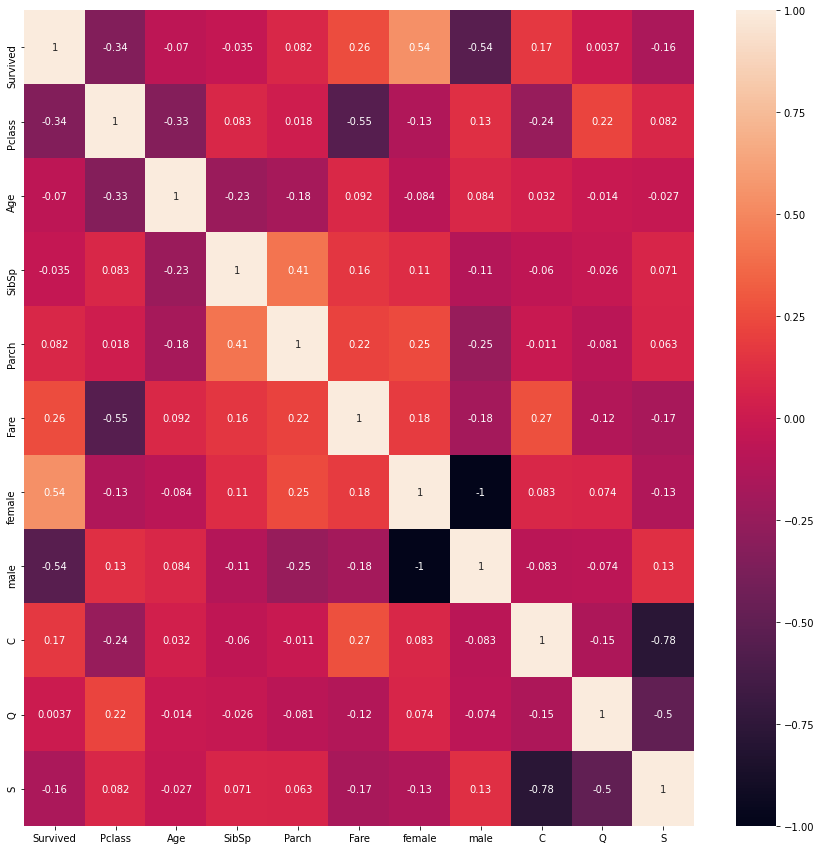

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)
#可以大概看出對於survived而言，哪些有較大的影響

In [34]:
y = x.Survived
del x['Survived']

In [35]:
y.shape

(891,)

In [36]:
x.shape

(891, 10)

In [37]:
model = keras.Sequential()

model.add(layers.Dense(128, input_dim=10, activation='relu'))#x.shape可以知道dim=10
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))#因為是二元結果，所以輸出只有1


In [38]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',#因為是二元輸出
    metrics=['acc']
)

In [40]:
history = model.fit(x, y, epochs=300, verbose=0)

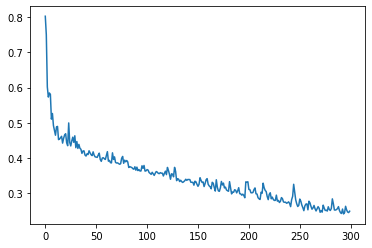

In [41]:
plt.plot(range(300),history.history.get('loss'))

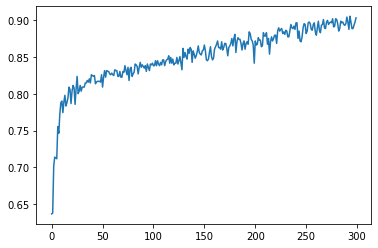

In [42]:
plt.plot(range(300),history.history.get('acc'))

In [111]:
#之後要對data_test也要做一樣的feature處理
x_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Cabin', 'Embarked']]
x_test = x_test.copy()


In [112]:
x_test = x_test.join(pd.get_dummies(x_test.Sex))#對sex做one hot
del x_test['Sex']
x_test = x_test.join(pd.get_dummies(x_test.Embarked))#對Embarked做one hot
del x_test['Embarked']

In [113]:
del x_test['Cabin']
x_test['Age'] = x_test.Age.fillna(x_test.Age.mean())#用Age的平均捕NaN

In [114]:
x_test.shape

(418, 10)

In [115]:
x_test

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


In [48]:
predictions = model.predict(x_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
submission = pd.DataFrame({"PassengerId": data_test["PassengerId"], "Survived": (predictions.flatten()>=0.5).astype('int')})


In [50]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
submission.to_csv("titanic_upload.csv", index=False)

In [116]:
del x['Survived']
del x['Age']
del x['SibSp']
del x['Parch']
del x['Q']
del x_test['Age']
del x_test['SibSp']
del x_test['Parch']
del x_test['Q']

In [117]:
model = keras.Sequential()

model.add(layers.Dense(128, input_dim=6, activation='relu'))#x.shape可以知道dim=6
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))#因為是二元結果，所以輸出只有1

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',#因為是二元輸出
    metrics=['acc']
)

In [122]:
x['Log_Fare'] = (x['Fare']+1).map(lambda y : np.log10(y) if y > 0 else 0)
x_test['Log_Fare'] = (x_test['Fare']+1).map(lambda y : np.log10(y) if y > 0 else 0)

In [124]:
del x['Fare']
del x_test['Fare']

In [128]:
history = model.fit(x, y, epochs=300, verbose=0)

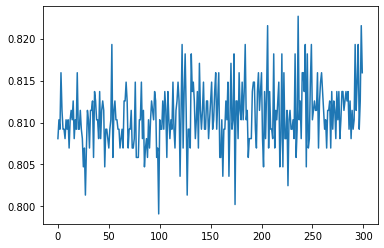

In [129]:
plt.plot(range(300),history.history.get('acc'))

In [130]:
predictions = model.predict(x_test)
submission = pd.DataFrame({"PassengerId": data_test["PassengerId"], "Survived": (predictions.flatten()>=0.5).astype('int')})
submission.to_csv("titanic_upload.csv", index=False)